In [1]:
import pandas as pd
import scienceplots
import matplotlib.pyplot as plt



# Define column names
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

# Load the .txt file (comma-separated)
df = pd.read_csv('../datasets/adult/adult.data', names=columns, sep=r'\s*,\s*', engine='python', skiprows=1)
df_test = pd.read_csv("../datasets/adult/adult.test",names=columns, sep=r'\s*,\s*', engine='python', skiprows=1)


In [2]:
X_train = df.drop(columns=["sex", "income", "fnlwgt"]) 

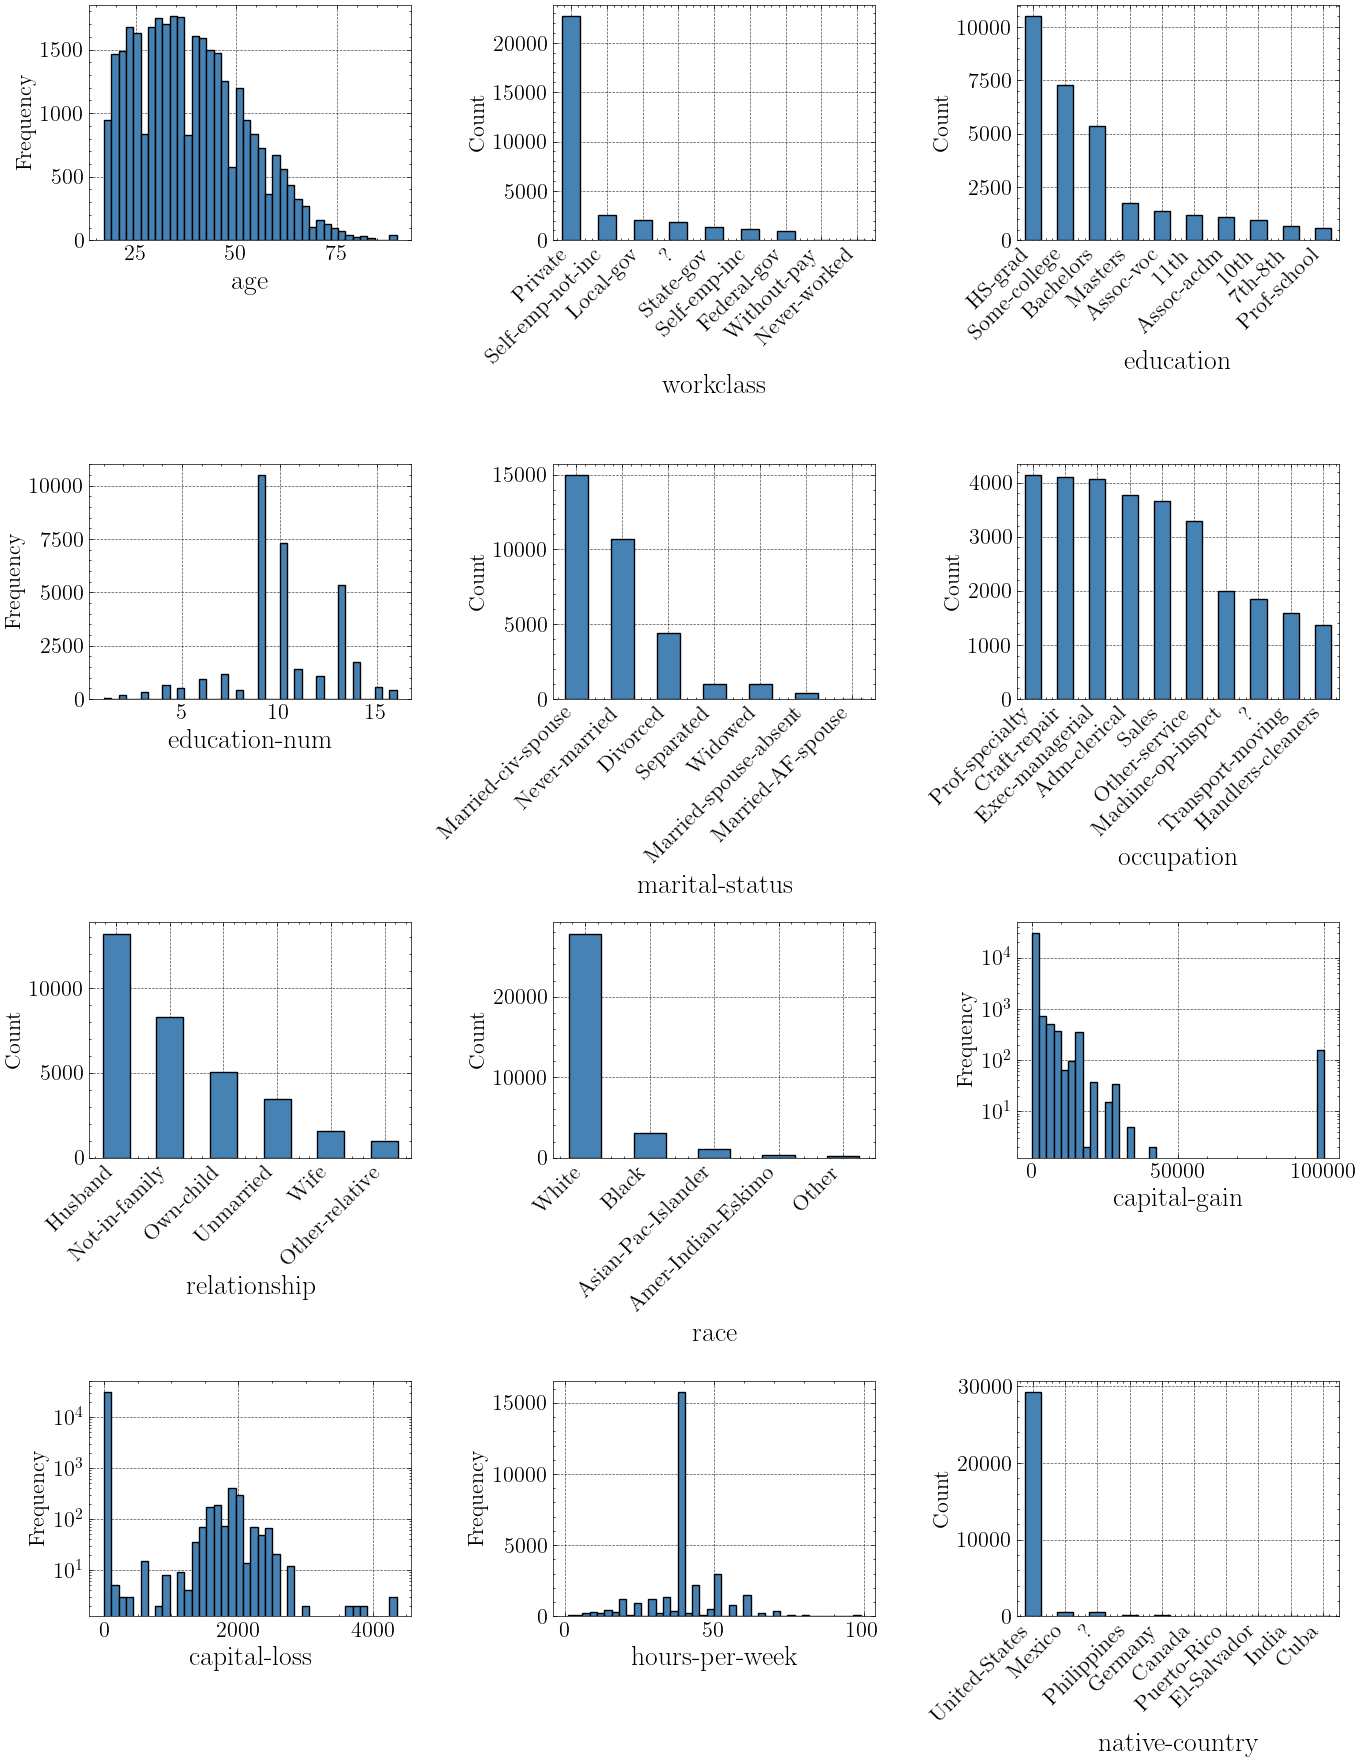

In [11]:
import matplotlib.pyplot as plt

#plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use(["science", "grid"])
plt.rcParams.update({
    'font.size': 16,
    'axes.labelsize': 16,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'grid.linestyle': '--',
    'grid.linewidth': 0.5,
    'grid.alpha': 0.7
})

features = [
    "age", "workclass", "education", "education-num",
    "marital-status", "occupation", "relationship", "race",
    "capital-gain", "capital-loss", "hours-per-week", "native-country"
]

fig, axes = plt.subplots(4, 3, figsize=(14, 18))
axes = axes.flatten()

for i, col in enumerate(features):
    ax = axes[i]
    if X_train[col].dtype == "object":
        vc = X_train[col].value_counts().head(10)  # top 10 categories
        vc.plot(kind="bar", ax=ax, edgecolor="k", color="steelblue")
        ax.set_ylabel("Count")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    else:
        ax.hist(X_train[col], bins=40, edgecolor="k", color="steelblue")
        ax.set_ylabel("Frequency")
        
        # Optional: log scale for skewed features
        if col in ["capital-gain", "capital-loss"]:
            ax.set_yscale("log")
    
    #ax.set_title(f"Distribution of {col}", fontsize=14, weight="bold")
    ax.set_xlabel(col, fontsize=20)
    #ax.tick_params(axis="both", which="major", labelsize=12)

plt.tight_layout()
plt.show()
